In [1]:
import h5py
import pandas as pd
import matplotlib.pyplot as plt

# hpm fgm

In [12]:
fp = r"\\Diskstation1\file_three\aw\zh1\hpm\fgm\1111pkl\fgm_20191111_0.pkl"

In [13]:
df = pd.read_pickle(fp)

# scm

In [4]:
fp = r"\\Diskstation1\file_three\aw\zh1\scm\ulf\201911\CSES_01_SCM_1_L02_A2_096790_20191031_233256_20191101_000821_000.h5"

In [5]:
print_name(fp)

A231_P
A231_W
A232_P
A232_W
A233_P
A233_W
ALTITUDE
FLAG
FREQ
GEO_LAT
GEO_LON
MAG_LAT
MAG_LON
PhaseX
PhaseY
PhaseZ
UTC_TIME
VERSE_TIME
WORKMODE


In [6]:
dfs_scm_ulf = get_dfs(fp)

In [27]:
verse_time = dfs_scm_ulf['VERSE_TIME'].squeeze()
datetime_ = pd.to_datetime(verse_time, origin='2009-01-01', unit='ms')
start_time = datetime_.iloc[0]

In [7]:
df_A231_W = dfs_scm_ulf['A231_W']

In [36]:
def get_resample_signal(df,start_time,original_freq:int=1024,target_freq:int=16):
    assert original_freq % target_freq == 0, "Original frequency must be divisible by target frequency"
    series_ = df.stack().reset_index(drop=True)
    resample_factor = int(original_freq / target_freq)
    series_resample = series_.iloc[::resample_factor]
    interval_s = 1/target_freq  # second
    time_index = pd.date_range(start=start_time, periods=len(series_resample), freq=f'{interval_s}s')
    series_resample.index = time_index
    return series_resample

2019-10-31 23:33:49.630000      -0.6775233745574951
2019-10-31 23:33:49.692500      -0.8249660730361938
2019-10-31 23:33:49.755000      -0.9568426609039307
2019-10-31 23:33:49.817500      -1.1198070049285889
2019-10-31 23:33:49.880000      -1.7610533237457275
                                      ...          
2019-11-01 00:08:13.317500     0.020880503579974174
2019-11-01 00:08:13.380000     0.022948123514652252
2019-11-01 00:08:13.442500   -0.0013918267795816064
2019-11-01 00:08:13.505000    -0.019318439066410065
2019-11-01 00:08:13.567500    -0.019383206963539124
Freq: 62500us, Length: 33024, dtype: float64

# efd

In [37]:
fp = r"\\Diskstation1\file_three\aw\zh1\efd\ulf\201911\CSES_01_EFD_1_L02_A1_096790_20191031_233350_20191101_000824_000.h5"

In [38]:
print_name(fp)

A111_P
A111_W
A112_P
A112_W
A113_P
A113_W
ALTITUDE
FREQ
GEO_LAT
GEO_LON
MAG_LAT
MAG_LON
UTC_TIME
VERSE_TIME
WORKMODE


In [39]:
dfs_efd_ulf = get_dfs(fp)
# utc_time, convert int64 into pd.Timestamp, first convert into str, then convert into pd.Timestamp using 'format' systax. But get an error, it seems not all element convert well, the utc_time may include irregular element.

In [40]:
# Convert 'VERSE_TIME' to pandas Timestamps
verse_time = dfs_efd_ulf['VERSE_TIME'].squeeze()
datetime_ = pd.to_datetime(verse_time, origin='2009-01-01', unit='ms')

In [44]:
a11 = get_resample_signal(dfs_efd_ulf['A111_W'],datetime_.iloc[0],original_freq=125,target_freq=25)

<Axes: >

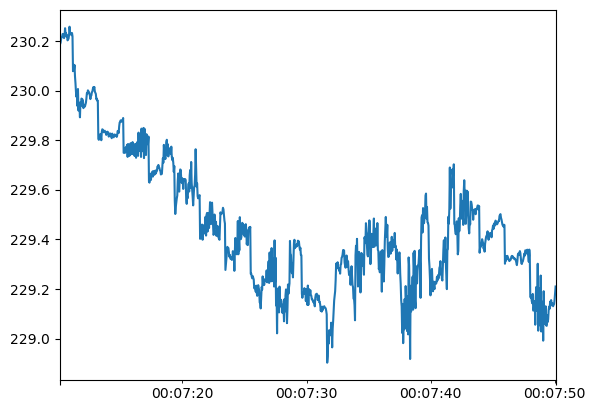

In [54]:
a11.iloc[-1000:].plot()

# lap

In [61]:
fp = r"\\Diskstation1\file_three\aw\zh1\lap\201911\CSES_01_LAP_1_L02_A3_096790_20191031_233232_20191101_000948_000.h5"

In [62]:
print_name(fp)

A311
A321
ALTITUDE
GEO_LAT
GEO_LON
MAG_LAT
MAG_LON
UF
UP
UTC_TIME
VERSE_TIME
WORKMODE


In [63]:
dfs_lap = get_dfs(fp)